# Problem: **Calssification** (Total score 60)

# **`Task 1 „Prediction with neural networks (NN)“ (20 Scores)`**

1) Complete all preparation steps as in previous assignments to clean, scale and prepare the
dataset for the analysis. Use the best scaler from your previous assignments.

*Read the data from your individual variant into Python notebook.*

In [ ]:
# Import some libraries for Data preprocessing
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wisc_bc_data.csv to wisc_bc_data.csv


In [ ]:
df = pd.read_csv('wisc_bc_data.csv')

*Output the main information (number of variables, number of instances).*

In [ ]:
# Number of variables
Number_of_Variables = df.shape[0]

# Number of instances
Number_of_Instances = df.shape[1]

print('Number of variables:', Number_of_Variables)
print('Number of instances:', Number_of_Instances)

Number of variables: 569
Number of instances: 32


In [ ]:
# info() function can give us also the main information of the data that we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*Our Data has 569 Observations and 32 variables. It seems that the data probably don't contain missing values.*

*Output some first rows of the dataset.*


In [ ]:
# head() function to output the first rows
df.head(10) # The number 10 gives us the first 10 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


*Make explanatory data analyses for each variable (mean, std, etc.).*

In [ ]:
# Describe() function gives us the main statistical information about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*The target variable **diagnosis** contain two classes. It can be considerer as a binary classification.*

In [ ]:
# Output the variance of each variable
variance = df.var()
print(variance)

id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.241674e+05


<ipython-input-9-58fbbb3c5e16>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


*Look at independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices.*

In [ ]:
# The dependent variable in our dataset is diagnosis
Y = df[['diagnosis']]

# Output the shape of the dependent variable
Y.shape

(569, 1)

In [ ]:
# The independent variavles are all the remaining columns
X = df.drop(['diagnosis'], axis= "columns")

# Output the shape of the independent variables
X.shape

(569, 31)

*The target variable, **dignosis** has a dimension of (569, 1), meaning there are 569 observations with one possible vaules, either 'M'(malignant) or 'B' (benign). The independent variables, with a dimension of (569, 31), are the features that might help predict the target variable. It'is reasonable to assume that this is a biinary classification problem.*

*Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.*

In [ ]:
# Encode the target variable using label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_encoded1 = encoder.fit_transform(Y)

# Convert the encoded array back to a Dataframe
Y_encoded = pd.DataFrame(Y_encoded1, index = Y.index, columns = Y.columns )

Y_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,diagnosis
0,1
1,1
2,1
3,1
4,1


*In this case, the target variable **diagnosis** has two categories. **M** will take label **1** and **B** will take label **0**.*

In [ ]:
# Drop the id column
X = X.drop('id', axis= "columns")
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


*Are there any Nan values? Try different filling of them (mean, median).*

In [ ]:
# Concat the data to use it in Task 2
df_preprocessed = pd.concat([X, Y_encoded], axis=1)

*Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.*

In [ ]:
# Correlation table betweem independent variable and dependent variable
data = X.copy()
data['diagnosis'] = Y_encoded

correlation_table = data.corr()['diagnosis']
correlation_table

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

<function matplotlib.pyplot.show(close=None, block=None)>

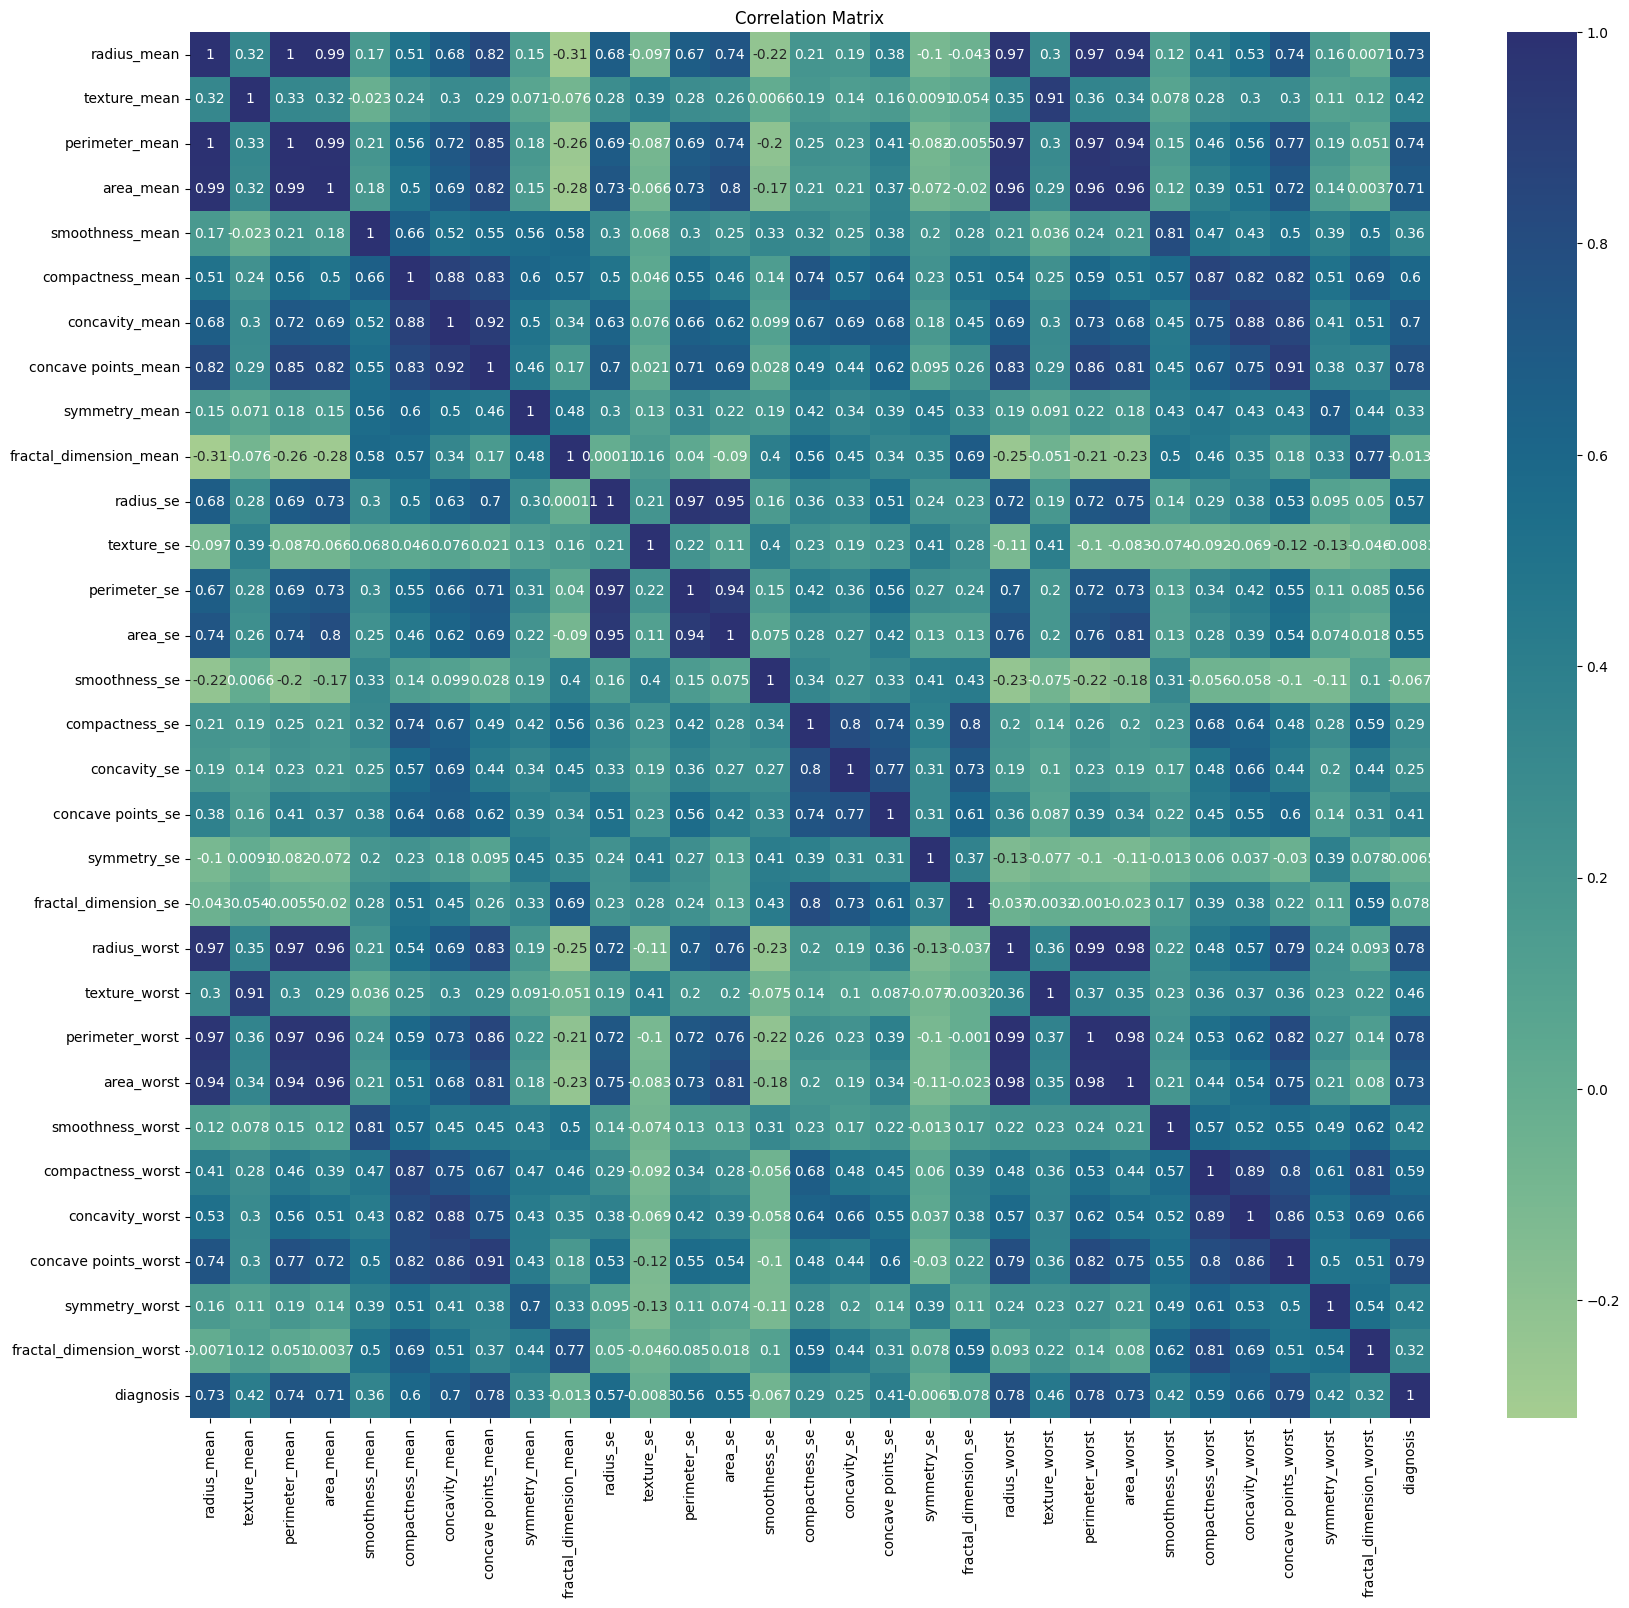

In [ ]:
# Correlation matrix with headmap among independent variables
import seaborn as sns
import matplotlib.pyplot as plt

correlation_all = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_all, annot= True, cmap= 'crest', square= False)
plt.title('Correlation Matrix')
plt.show

*The **concave point_mean** (**0.776**), **perimeter_worst** (**0.782**), and **concave points_worst** (**0.793**) have the strongest positive correlation with the target variable. These features might be particularly important in prediction the target variables.*

*Most of the features have a positive correlation with the target variable, meaning that as the value of the feature increases, the likelihood of the target variable being **M** (encoded as 1) also increases.*

*The **fractal_diemnsion_mean** (**-0.0128**), **texture_se** (**-0.0083**), and **symmetry_se** (**-0.0065**) have very weak negative correlations with the target variable compared to the other features.*

*There are some features that are highly correlated with each other, it is an indication of multicollinearity. It can cause problems in some machine learning models*

*It is important to note that correlation coefficients only capture linear relationships between variables and do not account for any potential nonlinear relationships. Additionally, correlation does not imply causation.*

*Scale the data with Minmax scaler*

In [ ]:
import tensorflow as tf
import random
import os

os.environ['PYTHONHASHSEED']=str(0)

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
#Scaling the data with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Independent Variables
minmaxscaler_X = MinMaxScaler()
minmaxscaled_X = minmaxscaler_X.fit_transform(X)
minmaxscaled_X_df = pd.DataFrame(minmaxscaled_X, columns = X.columns)

print('MinMax Scaled Independent Variables:')
print(minmaxscaled_X_df.head())

MinMax Scaled Independent Variables:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_w

*Divide your dataset into 2 parts: training set and testing set (80:20). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.*

In [ ]:
# Spliting the data into a training set and a testing set with 80:20
from sklearn.model_selection import train_test_split

# Ensure the production of the same results every time the code is run
random_state = 42

X_df_minmax = minmaxscaled_X_df

# Split the data
X_train_minmax, X_test_minmax,Y_train2, Y_test2 = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=random_state)

# Output the dimension of the resulting datasets
print('X_train_minmax dimension:', X_train_minmax.shape)
print('Y_train2 dimension :', Y_train2.shape)
print('X_test_minmax dimension:',X_test_minmax.shape)
print('Y_test2 dimension:', Y_test2.shape)

X_train_minmax dimension: (455, 30)
Y_train2 dimension : (455, 1)
X_test_minmax dimension: (114, 30)
Y_test2 dimension: (114, 1)


2) Construct a fully connected NN using keras library. The NN should contain 1-2 hidden
layers. Experiment with different number of neurons for each layer, try several dropout
layers between hidden layers, other parameters and find optimal training time. Try to
achieve the performance near or better than the best one of your previous methods. Present
the performance results (prediction results, accuracy, precision, recall, F1 metrics over
training set, ROC-AUC score) for the testset with 3 best architectures as a table. Use repeated
holdout cross-validation, generating 10 randomly selected training sets and test sets with
proportion according to your individual variant from assignment 2.

*First we create a function to create adn train a model based on the given parameters (num_layers, num_neurons, dropout_rate, optimizer, learning_rate, epochs).*

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

In [ ]:
def create_and_train_model(num_layers, num_neurons, dropout_rate, optimizer, learning_rate, epochs, verbose, X_train, Y_train, X_test, Y_test):
  model = Sequential()

  # Input layer
  model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu')) # X_train_minmax.shape[1]

  # Hidden layers
  for _ in range(num_layers):
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dropout(dropout_rate))

  # Output layer
  model.add(Dense(1, activation='sigmoid')) # Sigmoid for binary classification

  # Choose optimizer
  if optimizer == 'Adam':
    opt = Adam(learning_rate=learning_rate)
  elif optimizer == 'SGD':
    opt = SGD(learning_rate=learning_rate)

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  # Train the model and calculate training time
  start_time = time.time()
  model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=32, verbose=verbose)
  training_time = time.time() - start_time

  return model, training_time

In [ ]:
def evaluate_model(model, X_test, Y_test, display_predictions=False):
  # Generate predictions
  y_pred = (model.predict(X_test) > 0.5).astype('int32')

  # Calculate metrics
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  roc_auc = roc_auc_score(Y_test, y_pred)

  # Print actual and predicted values for comparaison
  df_pred = pd.DataFrame({'Actual':Y_test.values.ravel(), 'Predicted': y_pred.ravel()})

  if display_predictions:
    display(df_pred.head(20))

  metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1, 'ROC_AUC score': roc_auc}

  return metrics

*We start creating a model with:*
* 2 hidden layers
* 64 neurons in each hidden layer
* Dropout rate of 0, meaning that non of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.001
* The model is trained for 10 epochs.

In [ ]:
model_1, training_time_1 = create_and_train_model(2, 64, 0, 'SGD', 0.001, 10, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/10
15/15 [==============================] - 6s 18ms/step - loss: 0.6965 - accuracy: 0.6264 - val_loss: 0.6956 - val_accuracy: 0.6228
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.6264 - val_loss: 0.6948 - val_accuracy: 0.6228
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.6264 - val_loss: 0.6940 - val_accuracy: 0.6228
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.6264 - val_loss: 0.6931 - val_accuracy: 0.6228
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.6264 - val_loss: 0.6923 - val_accuracy: 0.6228
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.6264 - val_loss: 0.6916 - val_accuracy: 0.6228
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.6264 - val_loss: 0.6908 - val_accuracy: 0.6228
Epoch 8/10
15/15 [=

In [ ]:
evaluate_model(model_1, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predicted
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,0
8,0,0
9,0,0


{'Accuracy': 0.6228070175438597,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 score': 0.0,
 'ROC_AUC score': 0.5}

*The results show that the model with this architecture has a lower accuracy. However the **Precision**, **recall**, and **F1 score** are all 0.0. This means that the model didn't correctly predict any positive instances.*
*We notice that the from the accuracy and val_Accuracy in each epoch the model does not learn well.*

*We create now a model with:*
* 2 hidden layers
* 64 neurons in each hidden layer
* Dropout rate of 0.2, meaning that approximately 20% of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.001
* The model is trained for 10 epochs.

In [ ]:
model_2, training_time_2 = create_and_train_model(2, 64, 0.2, 'Adam', 0.001, 10, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/10
15/15 [==============================] - 2s 15ms/step - loss: 0.6821 - accuracy: 0.6330 - val_loss: 0.6381 - val_accuracy: 0.7281
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6184 - accuracy: 0.7341 - val_loss: 0.5461 - val_accuracy: 0.8772
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.8637 - val_loss: 0.4065 - val_accuracy: 0.9123
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3814 - accuracy: 0.8659 - val_loss: 0.2811 - val_accuracy: 0.9298
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.2854 - accuracy: 0.9033 - val_loss: 0.1901 - val_accuracy: 0.9386
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.9165 - val_loss: 0.1487 - val_accuracy: 0.9474
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1816 - accuracy: 0.9209 - val_loss: 0.1381 - val_accuracy: 0.9474
Epoch 8/10
15/15 [=

In [ ]:
evaluate_model(model_2, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 3ms/step


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,1
9,0,0


{'Accuracy': 0.9649122807017544,
 'Precision': 0.9333333333333333,
 'Recall': 0.9767441860465116,
 'F1 score': 0.9545454545454545,
 'ROC_AUC score': 0.9672453324598755}

*Overall, the model seems to be performing very well on all metrics (more the 90%), suggesting a good balance between recall and precision, and indicating string predictive power.*

*lets try now a model with:*
* 2 hidden layers
* 128 neurons in each hidden layer
* Dropout rate of 0.2, meaning that approximately 20% of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.001
* The model is trained for 20 epochs.

In [ ]:
model_3, training_time_3 = create_and_train_model(2, 128, 0.2, 'Adam', 0.001, 20, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/20
15/15 [==============================] - 2s 17ms/step - loss: 0.6244 - accuracy: 0.7890 - val_loss: 0.4974 - val_accuracy: 0.8596
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8571 - val_loss: 0.2860 - val_accuracy: 0.9035
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 0.3127 - accuracy: 0.8879 - val_loss: 0.2036 - val_accuracy: 0.9211
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.9011 - val_loss: 0.1501 - val_accuracy: 0.9386
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1831 - accuracy: 0.9099 - val_loss: 0.1248 - val_accuracy: 0.9386
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9363 - val_loss: 0.1223 - val_accuracy: 0.9474
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1250 - accuracy: 0.9516 - val_loss: 0.1032 - val_accuracy: 0.9561
Epoch 8/20
15/15 [=

In [ ]:
evaluate_model(model_3, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 3ms/step


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,0,0
9,0,0


{'Accuracy': 0.9298245614035088,
 'Precision': 1.0,
 'Recall': 0.813953488372093,
 'F1 score': 0.8974358974358974,
 'ROC_AUC score': 0.9069767441860466}

*The results of this model are quite good, but slightly different from the previous model's results.*
*The accuracy in this model is less than the previous one. The key difference is that while this model has very high precision, its recall is lower. This means it is not identifying all positive instances.*

*lets try now a model with:*
* 2 hidden layers
* 128 neurons in each hidden layer
* Dropout rate of 0.3, meaning that approximately 30% of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.01
* The model is trained for 20 epochs.

In [ ]:
model_4, training_time_4 = create_and_train_model(2, 128, 0.3, 'Adam', 0.01, 20, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/20
15/15 [==============================] - 3s 25ms/step - loss: 0.4566 - accuracy: 0.7868 - val_loss: 0.1119 - val_accuracy: 0.9386
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1857 - accuracy: 0.9275 - val_loss: 0.1684 - val_accuracy: 0.9298
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 0.2248 - accuracy: 0.9077 - val_loss: 0.0730 - val_accuracy: 0.9825
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 0.1166 - accuracy: 0.9560 - val_loss: 0.0866 - val_accuracy: 0.9561
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.1056 - accuracy: 0.9648 - val_loss: 0.1486 - val_accuracy: 0.9474
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1124 - accuracy: 0.9538 - val_loss: 0.0584 - val_accuracy: 0.9737
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0775 - accuracy: 0.9692 - val_loss: 0.1821 - val_accuracy: 0.9386
Epoch 8/20
15/15 [

In [ ]:
evaluate_model(model_4, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 3ms/step


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


{'Accuracy': 0.9649122807017544,
 'Precision': 1.0,
 'Recall': 0.9069767441860465,
 'F1 score': 0.951219512195122,
 'ROC_AUC score': 0.9534883720930232}

*This model with this architecture seems to have a good balance between the models tried earlier. It has a perfect precision, and its recall score is also high, althouth not as high as the second model's. It is important to remind that the best model depends on what is more important for the specific use case.*

*lets try now a model with:*
* 2 hidden layers
* 192 neurons in each hidden layer
* Dropout rate of 0.3, meaning that approximately 30% of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.001
* The model is trained for 20 epochs.

In [ ]:
model_5, training_time_5 = create_and_train_model(2, 192, 0.3, 'Adam', 0.001, 20, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/20
15/15 [==============================] - 3s 17ms/step - loss: 0.6181 - accuracy: 0.7868 - val_loss: 0.4558 - val_accuracy: 0.8947
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8615 - val_loss: 0.2175 - val_accuracy: 0.9211
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2660 - accuracy: 0.8879 - val_loss: 0.1448 - val_accuracy: 0.9474
Epoch 4/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.8923 - val_loss: 0.1374 - val_accuracy: 0.9474
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9275 - val_loss: 0.1058 - val_accuracy: 0.9649
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 0.9385 - val_loss: 0.0894 - val_accuracy: 0.9561
Epoch 7/20
15/15 [==============================] - 0s 7ms/step - loss: 0.1161 - accuracy: 0.9626 - val_loss: 0.0977 - val_accuracy: 0.9561
Epoch 8/20
15/15 [=

In [ ]:
evaluate_model(model_5, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 3ms/step


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,0,0
9,0,0


{'Accuracy': 0.956140350877193,
 'Precision': 1.0,
 'Recall': 0.8837209302325582,
 'F1 score': 0.9382716049382717,
 'ROC_AUC score': 0.9418604651162791}

*The results we obtained are quite good and suggest that the model is performing well.*
*The model has a perfect precsion and a high recall, F1 score and ROC AUC score. This indicates that the model is also very effective at classifiying positive instances correctly.*

*lets try now the architecture of the model 2 with higher learning rate:*
* 2 hidden layers
* 64 neurons in each hidden layer
* Dropout rate of 0.2, meaning that approximately 20% of the neurons in the dropout layers are ignored during each training step to prevent overfitting
* The Adam optimizer with a learning rate of 0.0001
* The model is trained for 10 epochs.

In [ ]:
model_6, training_time_6 = create_and_train_model(2, 64, 0.2, 'Adam', 0.0001, 10, 1, X_train_minmax, Y_train2, X_test_minmax, Y_test2)

Epoch 1/10
15/15 [==============================] - 2s 25ms/step - loss: 0.6917 - accuracy: 0.4791 - val_loss: 0.6846 - val_accuracy: 0.4737
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.6864 - accuracy: 0.5253 - val_loss: 0.6758 - val_accuracy: 0.6316
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 0.6765 - accuracy: 0.6066 - val_loss: 0.6667 - val_accuracy: 0.7895
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.6686 - accuracy: 0.6769 - val_loss: 0.6566 - val_accuracy: 0.8333
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.6601 - accuracy: 0.7385 - val_loss: 0.6463 - val_accuracy: 0.8509
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.6479 - accuracy: 0.7626 - val_loss: 0.6352 - val_accuracy: 0.9035
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 0.6414 - accuracy: 0.7473 - val_loss: 0.6238 - val_accuracy: 0.8947
Epoch 8/10
15/15 [

In [ ]:
evaluate_model(model_6, X_test_minmax, Y_test2, display_predictions=True)

4/4 [==============================] - 0s 3ms/step


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


{'Accuracy': 0.9035087719298246,
 'Precision': 1.0,
 'Recall': 0.7441860465116279,
 'F1 score': 0.8533333333333333,
 'ROC_AUC score': 0.872093023255814}

*We notice that when increasing the learning rate , the model does not generalize the data as good as the the model_2. This model in not as effective at detecting all the positive instances compared to other models we tried, as indicated by the lower recall.*

*Present
the performance results (prediction results, accuracy, precision, recall, F1 metrics over
training set, ROC-AUC score) for the testset with 3 best architectures as a table.*

*Based on all the perfromance results, we notice that the best three architecture are:*

* *The best architecture is: (model 2) **2** hidden layers, **64** neurons, dropout rate of **0.2**, learning rate of **0.001**, **Adam** optimizer, and 10 epochs.*

* *The second best architecture is: (model 4) **2** hidden layers, **128** neurons, dropout rate of **0.3**, learning rate of **0.01**, **Adam** optimizer and 20 epochs.*

* *The third best architecture is: (model 5) **2** hidden layers, **128** neurons, dropout rate of **0.3**, learning rate of **0.001**, **Adam** optimizer and 20 epochs.*

*We notice that the **Adam** optimizer has a huge effect on the best three models and also the learning rate.*

*For the rest of the assignment, lets chage the name of the models to "model1, model 2, model 3".*

In [ ]:
def evaluate_model2(model, X_test, Y_test, display_predictions=False):
  # Generate predictions
  y_pred = (model.predict(X_test) > 0.5).astype('int32')

  # Calculate metrics
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  roc_auc = roc_auc_score(Y_test, y_pred)

  # Print actual and predicted values for comparaison
  df_pred = pd.DataFrame({'Actual':Y_test.values.ravel(), 'Predicted': y_pred.ravel()})

  if display_predictions:
    display(df_pred.head(20))

  metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1, 'ROC_AUC score': roc_auc}

  return metrics, df_pred

In [ ]:
best_models = [model_2, model_4, model_5]

metrics_results = []
df_predictions= pd.DataFrame(Y_test2.values, columns=['Actual'])

for i, model in enumerate(best_models, start=1):
  metrics, df_pred = evaluate_model2(model, X_test_minmax, Y_test2, display_predictions=False)
  metrics['Model'] = f'Model {i}'
  metrics_results.append(metrics)

  df_pred.rename(columns={'Predicted': f'Model {i} Pred'}, inplace=True)
  df_predictions = pd.merge(df_predictions, df_pred[[f'Model {i} Pred']], left_index=True, right_index=True)

# Convert list of metrics dictionaries to DataFrame

df_metrics = pd.DataFrame(metrics_results)
df_metrics.set_index('Model', inplace=True)


display(df_metrics)
print('\n')
display(df_predictions)

4/4 [==============================] - 0s 4ms/step


,Accuracy,Precision,Recall,F1 score,ROC_AUC score
Model,,,,,
Model 1,0.964912,0.933333,0.976744,0.954545,0.967245
Model 2,0.964912,1.000000,0.906977,0.951220,0.953488
Model 3,0.956140,1.000000,0.883721,0.938272,0.941860


,Actual,Model 1 Pred,Model 2 Pred,Model 3 Pred
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
109,0,0,0,0
110,1,1,1,1
111,0,0,0,0
112,0,1,0,0


*Use repeated holdout cross-validation, generating 10 random
training sets and test sets with proportion according to your individual variant in
assignment 2.*

In [ ]:
# Initialize a dictionary to store metrics for each model
metrics = {
    'model 1': {"accuracy": [], "precision": [], "recall": [], "F1 score": [], "ROC AUC score": []},
    'model 2': {"accuracy": [], "precision": [], "recall": [], "F1 score": [], "ROC AUC score": []},
    'model 3': {"accuracy": [], "precision": [], "recall": [], "F1 score": [], "ROC AUC score": []},
}

# Pass the model parameters to lists
num_layers_list = [2, 2, 2]
num_neurons_list = [64, 128, 128]
dropout_rate_list = [0.2, 0.3, 0.3]
optimizer_list = ['Adam', 'Adam', 'Adam']
learning_rate_list = [0.001, 0.01, 0.01]
epochs_list = [10, 20, 20]

for i in range(3):
  print(f'Performing cross-validation for model {i + 1}...')
  for j in range(10): # 10 times for the holdout validation
    X_train, X_test, Y_train, Y_test = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=random_state)

    model, training_time = create_and_train_model(num_layers_list[i], num_neurons_list[i], dropout_rate_list[i],
                                                  optimizer_list[i], learning_rate_list[i], epochs_list[i], verbose=0, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

    predictions_proba = model.predict(X_test, verbose=0)
    predictions = (predictions_proba > 0.5) * 1

    # Calculate metrics
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    roc_auc = roc_auc_score(Y_test, predictions)

    # Store the metrics
    metrics[f"model {i+1}"]['accuracy'].append(accuracy)
    metrics[f"model {i+1}"]['precision'].append(precision)
    metrics[f"model {i+1}"]['recall'].append(recall)
    metrics[f"model {i+1}"]['F1 score'].append(f1)
    metrics[f"model {i+1}"]['ROC AUC score'].append(roc_auc)

# Calculate and print the average metrics for each model
for model in metrics.keys():
  print(f"\nMetrics for {model}:")
  for metric in metrics[model].keys():
    avg_metric = np.mean(metrics[model][metric])
    print(f"Average {metric} for {model}: {avg_metric}")
  print()

Performing cross-validation for model 1...
Performing cross-validation for model 2...
Performing cross-validation for model 3...

Metrics for model 1:
Average accuracy for model 1: 0.9675438596491229
Average precision for model 1: 0.967406575273847
Average recall for model 1: 0.9465116279069766
Average F1 score for model 1: 0.9564813574154674
Average ROC AUC score for model 1: 0.963396659023911


Metrics for model 2:
Average accuracy for model 2: 0.9622807017543862
Average precision for model 2: 1.0
Average recall for model 2: 0.9
Average F1 score for model 2: 0.9471456013756926
Average ROC AUC score for model 2: 0.9499999999999998


Metrics for model 3:
Average accuracy for model 3: 0.9596491228070174
Average precision for model 3: 1.0
Average recall for model 3: 0.8930232558139535
Average F1 score for model 3: 0.9431328051637198
Average ROC AUC score for model 3: 0.9465116279069768



**Import the 8 models of assignment 1-2**

In [ ]:
# best hyperparameters for each model
# We are using here the optimal hyperparameters found in the Scaled data with MinMax Scaler
best_parameters_lr = {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
best_parameters_dt = {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
best_parameters_knn = {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
best_parameters_svm = {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
best_parameters_rf = {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
best_parameters_xgb = {'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1e-05, 'reg_lambda': 0, 'subsample': 0.8}
best_parameters_cat = {'depth': 4, 'iterations': 90, 'learning_rate': 0.04}
best_parameters_lgb = {'bagging_fraction': 0.1, 'feature_fraction': 0.3, 'max_depth': 6, 'min_data_in_leaf': 45, 'num_leaves': 500}


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Define functions to evaluate the models and print the metrics

# Training set
def evaluate_model_training_set(model, X_train, Y_train, verbose=True):
  # Train the model with the training set
  model.fit(X_train, Y_train)

  # Metrics
  train_pred = model.predict(X_train)
  cm_train = confusion_matrix(Y_train, train_pred)
  acc_train = accuracy_score(Y_train, train_pred)

  # Output the confusion matrix and accuracy for the training set
  if verbose :
    print("Confusion matrix (training set): \n", cm_train)
    print("Accuracy (training set):", acc_train)

  return {'Confusion Matrix': cm_train, 'accuracy': acc_train}

# Testing set
def evaluate_model_testing_set(model, X_test, Y_test, verbose=True):
  # Test the model with the test set and calculate the metrics
  test_pred = model.predict(X_test)
  cm_test = confusion_matrix(Y_test, test_pred)
  acc_test = accuracy_score(Y_test, test_pred)

  # Output the confusion matrix and accuracy for the training set
  if verbose:
    print("Confusion matrix (testing set): \n", cm_test)
    print("Accuracy (testing set):", acc_test)

  return {'Confusion Matrix': cm_test, 'accuracy': acc_test}

**Logistic Regression**

In [ ]:
# Build the logistic model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(**best_parameters_lr)

# Train with training set and output the confusion matrix and the accuracy using training set
print("Logistic regression (Training set):")
evaluate_model_training_set(logistic_regression, X_train_minmax, Y_train2)

Logistic regression (Training set):
Confusion matrix (training set): 
 [[284   2]
 [  7 162]]
Accuracy (training set): 0.9802197802197802


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[284,   2],
        [  7, 162]]),
 'accuracy': 0.9802197802197802}

In [ ]:
# Test the model with the testset and output the confusion matrix and the accuracy using testing set
print("Logistic regression (Testing set):")
evaluate_model_testing_set(logistic_regression, X_test_minmax, Y_test2)

Logistic regression (Testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 2 41]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[70,  1],
        [ 2, 41]]),
 'accuracy': 0.9736842105263158}

**Decision Tree classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Testing the model using the best hyperparameters
def decision_tree():
  decision_tree2 = DecisionTreeClassifier(**best_parameters_dt)
  decision_tree2.fit(X_train_minmax, Y_train2)
  return decision_tree2

# Test the model with the best hyperparameters
dt_test = decision_tree()
print('Metrics of the decision tree model with the best hyperparameters (training set):')
evaluate_model_training_set(dt_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the decision tree model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[284   2]
 [  5 164]]
Accuracy (training set): 0.9846153846153847


{'Confusion Matrix': array([[284,   2],
        [  5, 164]]),
 'accuracy': 0.9846153846153847}

In [ ]:
print('Metrics of the decision tree model with the best hyperparameters (testing set):')
evaluate_model_testing_set(dt_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the decision tree model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[66  5]
 [ 2 41]]
Accuracy (testing set): 0.9385964912280702


{'Confusion Matrix': array([[66,  5],
        [ 2, 41]]),
 'accuracy': 0.9385964912280702}

**kNN : k nearest neighbours classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Testing the model using the best hyperparameters
def knn():
  knn2 = KNeighborsClassifier(**best_parameters_knn)
  knn2.fit(X_train_minmax, Y_train2)
  return knn2

# Test the model with the best hyperparameters
knn_test = knn()
print('Metrics of the knn model with the best hyperparameters (training set):')
evaluate_model_training_set(knn_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the knn model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[285   1]
 [  4 165]]
Accuracy (training set): 0.989010989010989


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'Confusion Matrix': array([[285,   1],
        [  4, 165]]),
 'accuracy': 0.989010989010989}

In [ ]:
print('Metrics of the knn model with the best hyperparameters (testing set):')
evaluate_model_testing_set(knn_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the knn model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[69  2]
 [ 2 41]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[69,  2],
        [ 2, 41]]),
 'accuracy': 0.9649122807017544}

**Support vector machine**

In [ ]:
from sklearn.svm import SVC
# Testing the model using the best hyperparameters
def svm():
  svm2 = SVC(**best_parameters_svm)
  svm2.fit(X_train_minmax, Y_train2)
  return svm2

# Test the model with the best hyperparameters
svm_test = svm()
print('Metrics of the svm model with the best hyperparameters (training set):')
evaluate_model_training_set(svm_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the svm model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[284   2]
 [  6 163]]
Accuracy (training set): 0.9824175824175824


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[284,   2],
        [  6, 163]]),
 'accuracy': 0.9824175824175824}

In [ ]:
print('Metrics of the svm model with the best hyperparameters (testing set):')
evaluate_model_testing_set(svm_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the svm model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[71  0]
 [ 2 41]]
Accuracy (testing set): 0.9824561403508771


{'Confusion Matrix': array([[71,  0],
        [ 2, 41]]),
 'accuracy': 0.9824561403508771}

**Random Forrest classifier**

In [ ]:
# Build random forest classification
from sklearn.ensemble import RandomForestClassifier

# Testing the model using the best hyperparameters
def random_forest():
  rf2 = RandomForestClassifier(**best_parameters_rf)
  rf2.fit(X_train_minmax, Y_train2)
  return rf2

# Test the model with the best hyperparameters
rf_test = random_forest()
print('Metrics of the rf model with the best hyperparameters (training set):')
evaluate_model_training_set(rf_test, X_train_minmax, Y_train2.values.ravel())

<ipython-input-61-ce4d8c908281>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train_minmax, Y_train2)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Metrics of the rf model with the best hyperparameters (training set):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the rf model with the best hyperparameters (testing set):')
evaluate_model_testing_set(rf_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the rf model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 3 40]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[70,  1],
        [ 3, 40]]),
 'accuracy': 0.9649122807017544}

**XGBoost classifier**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Build the XGboost model
from xgboost import XGBClassifier

In [ ]:
# Testing the model using the best hyperparameters
def xgboost():
  xgb2 = XGBClassifier(**best_parameters_xgb)
  xgb2.fit(X_train_minmax, Y_train2)
  return xgb2

# Test the model with the best hyperparameters
xgb_test = xgboost()
print('Metrics of the XGBoost model with the best hyperparameters (training set):')
evaluate_model_training_set(xgb_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the XGBoost model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the XGBoost model with the best hyperparameters (testing set):')
evaluate_model_testing_set(xgb_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the XGBoost model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 1 42]]
Accuracy (testing set): 0.9824561403508771


{'Confusion Matrix': array([[70,  1],
        [ 1, 42]]),
 'accuracy': 0.9824561403508771}

**CatBoost classifier**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.5 MB/s eta 0:00:00


In [ ]:
# Testing the model using the best hyperparameters
from catboost import CatBoostClassifier
def catboost():
  cat2 = CatBoostClassifier(**best_parameters_cat, verbose= False)
  cat2.fit(X_train_minmax, Y_train2)
  return cat2

# Test the model with the best hyperparameters
cat_test = catboost()
print('Metrics of the CatBoost model with the best hyperparameters (training set):')
evaluate_model_training_set(cat_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the CatBoost model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  2 167]]
Accuracy (training set): 0.9956043956043956


{'Confusion Matrix': array([[286,   0],
        [  2, 167]]),
 'accuracy': 0.9956043956043956}

In [ ]:
print('Metrics of the CatBoost model with the best hyperparameters (testing set):')
evaluate_model_testing_set(cat_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the CatBoost model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[71  0]
 [ 3 40]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[71,  0],
        [ 3, 40]]),
 'accuracy': 0.9736842105263158}

**Light GBM classifier**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
# Testing the model using the best hyperparameters
def lgbm():
  lgb2 = LGBMClassifier(**best_parameters_lgb)
  lgb2.fit(X_train_minmax, Y_train2)
  return lgb2

# Test the model with the best hyperparameters
lgb_test = lgbm()
print('Metrics of the Light GBM model with the best hyperparameters (training set):')
evaluate_model_training_set(lgb_test, X_train_minmax, Y_train2.values.ravel())

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
Metrics of the Light GBM model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the Light GBM model with the best hyperparameters (testing set):')
evaluate_model_testing_set(lgb_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the Light GBM model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 2 41]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[70,  1],
        [ 2, 41]]),
 'accuracy': 0.9736842105263158}



# **`Task 2 ““Evaluate the feature importances in the NN model” (20 Scores)`**

1) Use “Drop column Importance” to calculate the feature importances of the NN model.
Average the results with 10 different random number generators. Output the results as a
table and as a bar plot.

                              684       559       629       192       835  \
radius_mean             -0.008772  0.000000  0.017544 -0.008772  0.026316   
texture_mean             0.000000  0.000000  0.026316 -0.017544  0.008772   
perimeter_mean          -0.008772  0.000000  0.026316 -0.008772  0.000000   
area_mean               -0.017544  0.000000  0.043860 -0.008772 -0.008772   
smoothness_mean          0.008772  0.000000  0.000000 -0.008772 -0.008772   
compactness_mean         0.000000  0.000000 -0.008772  0.000000 -0.008772   
concavity_mean           0.000000  0.000000  0.017544 -0.008772  0.008772   
concave points_mean      0.008772  0.017544  0.000000 -0.008772  0.008772   
symmetry_mean           -0.008772  0.000000 -0.008772 -0.017544  0.026316   
fractal_dimension_mean  -0.008772  0.000000  0.043860 -0.026316  0.008772   
radius_se                0.000000  0.000000  0.035088 -0.008772 -0.008772   
texture_se               0.000000 -0.008772  0.017544 -0.017544 -0.008772   

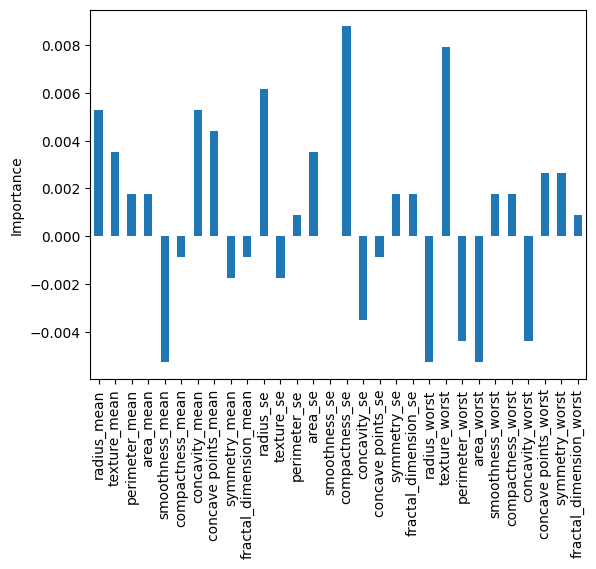

In [ ]:
# Function for Drop column Importance
def calculate_drop_column_importance(num_layers, num_neurons, dropout_rate, optimizer, learning_rate, epochs, X, Y, random_states, metric=accuracy_score):

  if X.columns.duplicated().any():
    raise ValueError('Input DataFrame has duplicated column names')

  drop_column_importances = pd.DataFrame(index=X.columns)

  for state in random_states:
     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)

     # The original model
     model, _  = create_and_train_model(num_layers, num_neurons, dropout_rate, optimizer, learning_rate, epochs, 0, X_train, Y_train, X_test, Y_test)
     predictions = (model.predict(X_test, verbose=0) > 0.5)*1
     original_performance = metric(Y_test, predictions)

     performances = []

     for column in X.columns:

      X_dropped = X.drop(columns=column)
      X_train, X_test, Y_train, Y_test = train_test_split(X_dropped, Y, test_size=0.2, random_state=state)

      model, _  = create_and_train_model(num_layers, num_neurons, dropout_rate, optimizer, learning_rate, epochs, 0, X_train, Y_train, X_test, Y_test)
      predictions = (model.predict(X_test, verbose=0) > 0.5)  *1

      performance = metric(Y_test, predictions)


      # Store the difference in performance
      performances.append(original_performance - performance)
     drop_column_importances[state] = performances

  drop_column_importances['Mean Importance'] = drop_column_importances.mean(axis=1)

  return drop_column_importances

# 10 different random number generators
random_states = np.random.randint(0, 1000, size=10)

drop_column_importances = calculate_drop_column_importance(2, 64, 0.2, 'Adam', 0.001, 10, X_df_minmax, Y_encoded, random_states)

# Print the results
print(drop_column_importances)

# Plot the results
drop_column_importances['Mean Importance'].plot(kind='bar')
plt.ylabel('Importance')
plt.show()

*As we notice the results are the average differences in accuracy between a model trained wth all features and models trained without one feature.*

*Here are a few observations from the results:*

* **radius_worst** *has the highest negative importance (**-0.014**), meaning that leaving out this feature made the model perform worst. Therefore, this feature is very important for the model's accuracy.*

* **compactness_se** *has a positive importance, which means the model performed slightly better on average when this feature was dropped. Thus, it seems this feature is not very useful and might even be slightly harmful for the model's performance.*

* *Many features have an importance around zero, which indicates they didn't have much impact on the model's performance when they were dropped.*

2) Use “Permutation Importance” method to calculate the feature importances of the NN
model. Average the results with 10 different splitting into training and testset. Use
(n_repeats=10) as a parameter of the permutation importance function. Present the results
as a bar plot

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=f04e368e06d256dc9ef7b2cd5a5f92a1e5199bd1cdfdaf850401e14e2061ace9
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
def binary_accuracy(estimator, X, y):
  y_pred = (estimator.predict(X, verbose=0) > 0.5).astype(int)
  return accuracy_score(y, y_pred)

,684,559,629,192,835,763,707,359,9,723,Mean Importance
radius_mean,0.000000e+00,0.000000,0.000000,-4.385965e-03,-4.385965e-03,-0.001754,0.010526,0.000000,0.002632,-0.002632,-1.561251e-17
texture_mean,-7.894737e-03,0.000877,0.001754,9.649123e-03,7.894737e-03,-0.009649,0.006140,0.007895,0.022807,-0.006140,3.333333e-03
perimeter_mean,-3.508772e-03,-0.000877,0.000877,1.754386e-03,3.508772e-03,-0.005263,0.003509,-0.003509,0.008772,-0.002632,2.631579e-04
area_mean,-8.771930e-04,-0.000877,0.000877,-1.754386e-03,1.754386e-03,-0.003509,0.004386,-0.005263,0.006140,-0.000877,-1.557999e-17
smoothness_mean,-7.894737e-03,0.001754,0.005263,8.771930e-04,-8.771930e-03,-0.005263,0.008772,0.003509,0.013158,-0.003509,7.894737e-04
compactness_mean,-6.140351e-03,0.003509,0.000000,9.649123e-03,1.052632e-02,-0.001754,-0.000877,-0.000877,0.010526,-0.012281,1.228070e-03
concavity_mean,1.491228e-02,0.032456,0.023684,3.771930e-02,4.736842e-02,0.028070,0.025439,0.026316,0.044737,-0.001754,2.789474e-02
concave points_mean,4.210526e-02,0.072807,0.053509,5.877193e-02,6.315789e-02,0.064035,0.042105,0.036842,0.063158,0.024561,5.210526e-02
symmetry_mean,-8.771930e-03,0.000000,-0.007895,-1.052632e-02,-6.140351e-03,-0.016667,0.001754,-0.011404,0.006140,-0.014035,-6.754386e-03
fractal_dimension_mean,-6.140351e-03,0.001754,0.007018,7.894737e-03,2.456140e-02,-0.012281,0.022807,0.016667,0.018421,0.002632,8.333333e-03


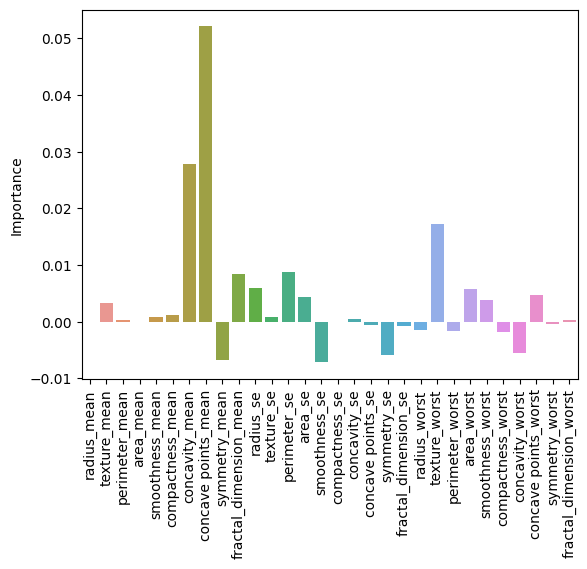

In [ ]:
from sklearn.inspection import permutation_importance
import seaborn as sns

def calculate_permutation_importance(model, X, Y, random_states, n_repeats=10):
  permutation_importances = pd.DataFrame(index=X.columns)

  for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)

    r = permutation_importance(model, X_test, Y_test, n_repeats=n_repeats, random_state=state, scoring=binary_accuracy)

    permutation_importances[state] = r.importances_mean

  permutation_importances['Mean Importance'] = permutation_importances.mean(axis=1)

  return permutation_importances

#random_states = np.random.randint(0, 1000, size=10)

permutation_importances = calculate_permutation_importance(model_2, X_df_minmax, Y_encoded, random_states)

display(permutation_importances)

sns.barplot(x=permutation_importances.index, y=permutation_importances['Mean Importance'])
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

*Permutation importance is a way to compute feature importance by permuting the values of the features and measuring how much the performance decreases.*

*From the results, features like **concave points_mean**, **concavity_mean** have the highest importance, as indicated by their high positive mean importance scores. This means that these features have a significant positive impact on the model's predictive performance.*

*On the other hand, features like **symmetrie_se** and **symmetrie_mean** have negatice Mean Importance scores. This suggest that these features might be unimportant or even harmful to the model's performance.*

3) Output the logistic regression explainability results (assignment 1), which correspond to
model coefficients from assignment 1. Average the results with 10 different splitting into
training and testset. Visualise the results with a bar plot.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

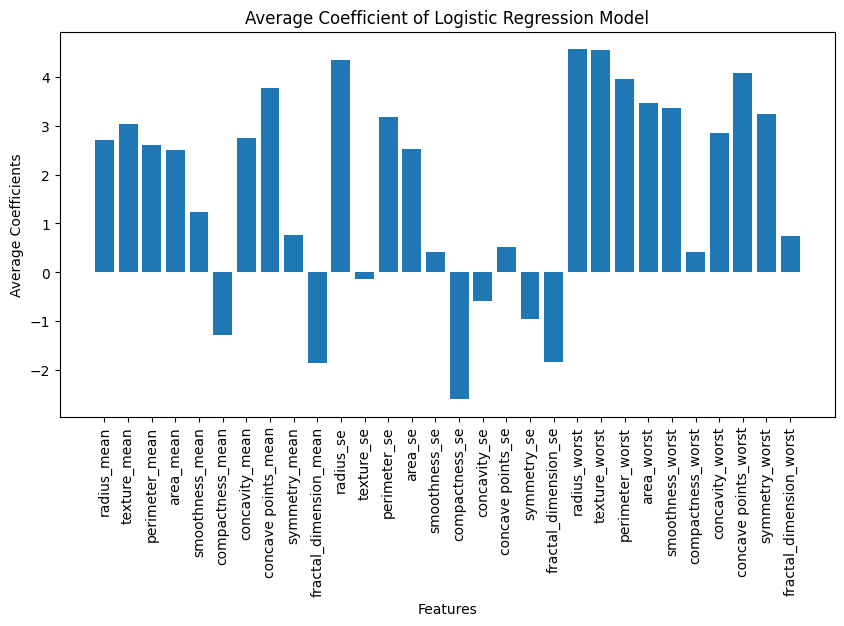

In [ ]:
# Initialize an array to hold coefficients foe each feature
coefficients = []

for i in random_states:
  # Split the data
  X_train, X_test, Y_train, Y_test = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=i)

  logistic_regression = LogisticRegression(**best_parameters_lr)
  logistic_regression.fit(X_train, Y_train)

  coefficients.append(logistic_regression.coef_)

avg_coefficients_lr = np.mean(coefficients, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(X_df_minmax.columns, avg_coefficients_lr.flatten())
plt.xlabel('Features')
plt.ylabel('Average Coefficients')
plt.title('Average Coefficient of Logistic Regression Model')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Ploting a table of the exact coefficients values to interprete them
coef_df = pd.DataFrame(avg_coefficients_lr.flatten(), index=X_df_minmax.columns, columns=['Average Coefficients'])
print(coef_df)

                         Average Coefficients
radius_mean                          2.719287
texture_mean                         3.045785
perimeter_mean                       2.598901
area_mean                            2.506270
smoothness_mean                      1.228359
compactness_mean                    -1.286943
concavity_mean                       2.752138
concave points_mean                  3.776969
symmetry_mean                        0.756937
fractal_dimension_mean              -1.856552
radius_se                            4.358750
texture_se                          -0.128213
perimeter_se                         3.188784
area_se                              2.527223
smoothness_se                        0.420533
compactness_se                      -2.598446
concavity_se                        -0.582356
concave points_se                    0.514569
symmetry_se                         -0.966912
fractal_dimension_se                -1.837759
radius_worst                      

*Some key observation from these results include:*

*  **radius_worst**: *This feature has the highest average coefficient (**4.57**), implying that changes in this feature have the most substantial effect on the prediction of the logistic regression model. Specifically, a one unit increase in this feature increases the log-odds of the posititve class by **4.57** units, assuming all other variable stay the same.*

* **compactness_se**: *This feature has a negative coefficient (**-2.59**), indicating that increases in this feature decrease the log.odds of the positive class. Essentially, higher **compactness_se** values are associated with a decrease in the likelihood of the positve class, all else being equal.*

4) Take one of the models from assignment 2 according to your individual variant (Random
Forest, XGBoost, CatBoost, LightGBM) and output its build-in feature importances (use
model.feature_importances_). Average the results with 10 different splitting into
training and testset.

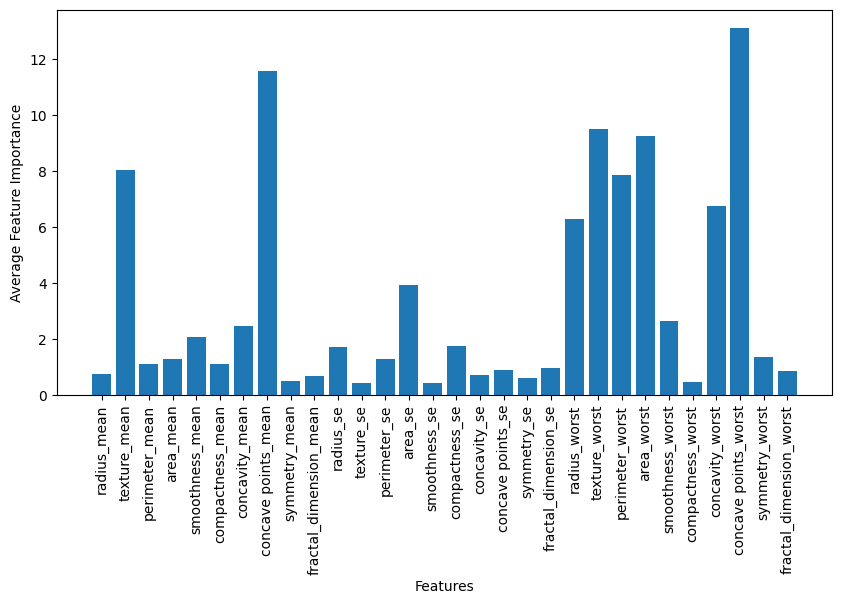

In [ ]:
# Collect feature importance
feature_importances = []

for state in random_states:
  X_train, X_test, Y_train, Y_test = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=i)

  cat_model = CatBoostClassifier(**best_parameters_cat)
  cat_model.fit(X_train_minmax, Y_train2, verbose=False)

  feature_importances.append(cat_model.feature_importances_)

feature_importances = np.array(feature_importances)

avg_importances_cat = feature_importances.mean(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(X_df_minmax.columns, avg_importances_cat)
plt.xlabel('Features')
plt.ylabel('Average Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Ploting a table of the exact coefficients values to interprete them
importances_df = pd.DataFrame(avg_importances_cat.flatten(), index=X_df_minmax.columns, columns=['Average Coefficients'])
display(importances_df)

,Average Coefficients
radius_mean,0.734382
texture_mean,8.022742
perimeter_mean,1.107499
area_mean,1.261719
smoothness_mean,2.043607
compactness_mean,1.083300
concavity_mean,2.455552
concave points_mean,11.565527
symmetry_mean,0.487256
fractal_dimension_mean,0.674786


*The top features in term of importance, as determined by the XGBoost model, are:*

* **concave points_worst**: *This is the most importanr feature with an importance score of about **13.11**. This indicates that changes in this variable have the most significant impact on the model's predictions.*

* **concave points_mean**: *This is a score of about **11.56**, making the third most important feature.*


* **area_worst**: *This is the second most important feature with an important score of approximateley **9.23**.*


* *The least important features seem to be **smoothness_se** and **compactness_worst**  This suggests that these features have no significant impact on the model's predicitons.*

5) Compare the results obtained on steps 1-4. Scale the explainability results (the sum of
importances shuld be equal with 1 within one model) of some methods if necessary and
present all the explainability results at one bar plot. Which variables are the most
important for the prediction. Are all the explainability results the same (inside one NN
model with different explainability methods, between different models)? Make
conclusions.

In [ ]:
# Transform the Mean Importance of the drop column and permutation algorithm into np.array
drop_column_imp = drop_column_importances['Mean Importance'].values
permutation_imp = permutation_importances['Mean Importance'].values

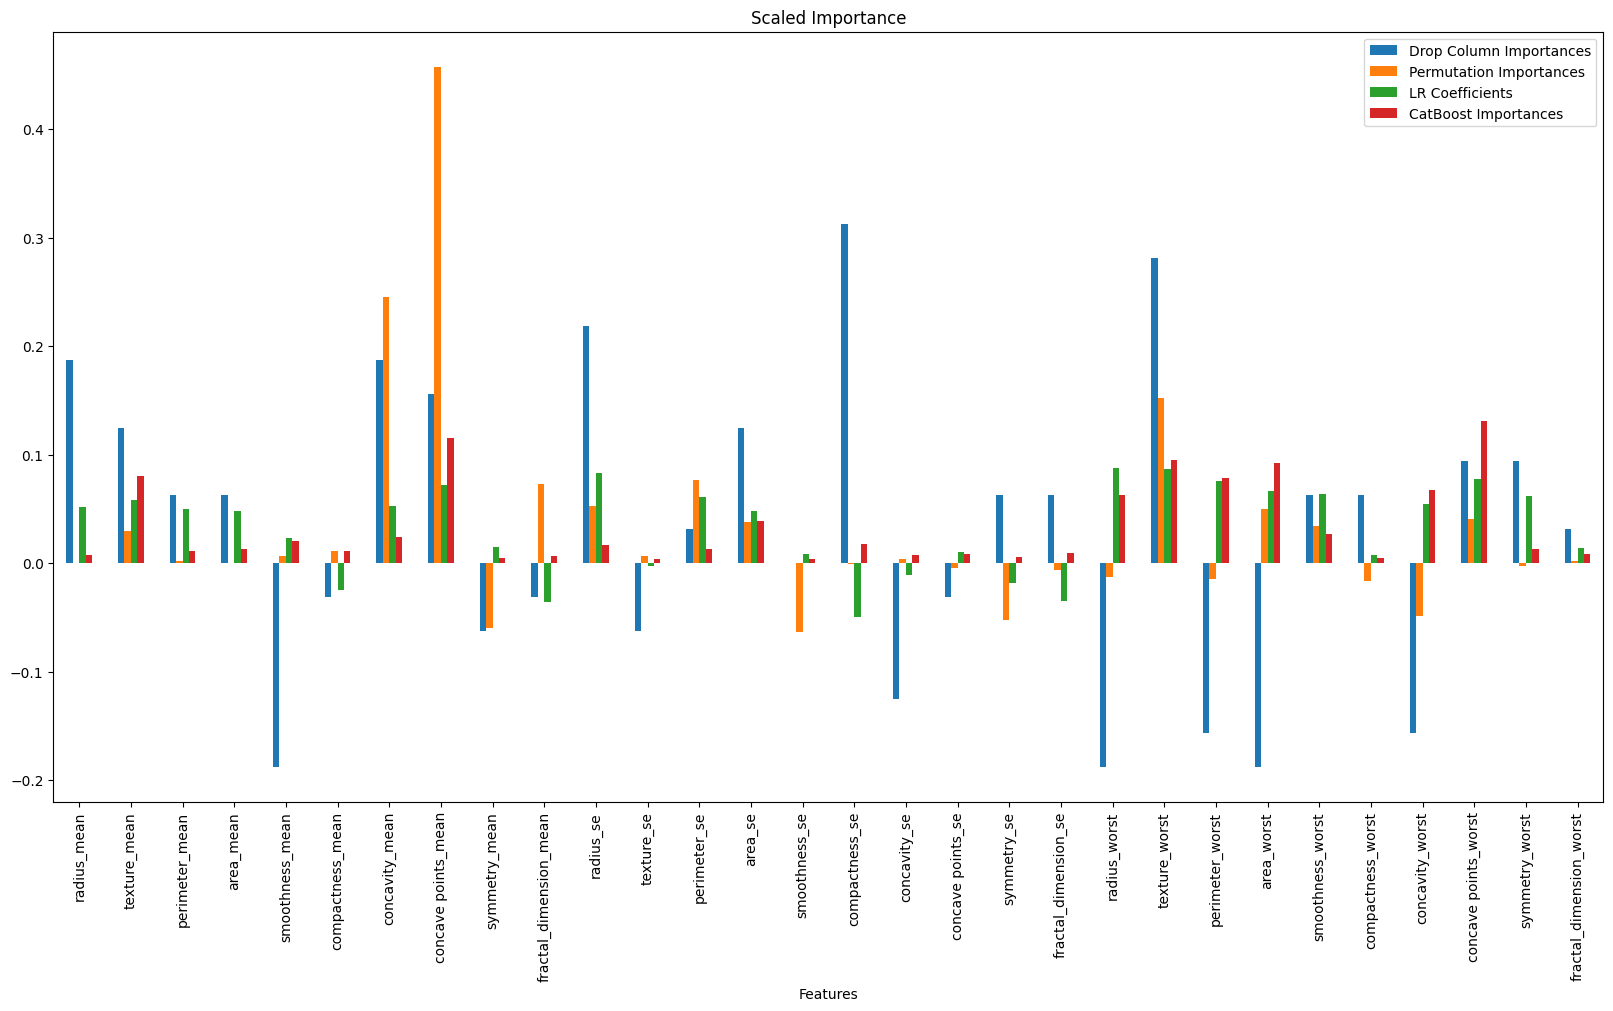

In [ ]:
# Scale the explainability results for the models where the results are not equal to one
drop_column_importances_scaled = drop_column_imp / np.sum(drop_column_imp)
permutation_importances_scaled = permutation_imp / np.sum(permutation_imp)
avg_coefficients_lr_scaled = avg_coefficients_lr / np.sum(avg_coefficients_lr)
avg_importances_cat_scaled = avg_importances_cat / np.sum(avg_importances_cat)

# Get the columns
features = X_train_minmax.columns.tolist()

# Convert the numpy arrays to DataFrame
df_drop = pd.DataFrame(drop_column_importances_scaled, index=features, columns=['Drop Column Importances'])
df_permutation = pd.DataFrame(permutation_importances_scaled, index=features, columns=['Permutation Importances'])
df_coef = pd.DataFrame(avg_coefficients_lr_scaled.flatten(), index=features, columns=['LR Coefficients'])
df_feature_importances = pd.DataFrame(avg_importances_cat_scaled, index=features, columns=['CatBoost Importances'])

df_all = pd.concat([df_drop, df_permutation, df_coef, df_feature_importances], axis=1)

# Plot them in one bar chart
df_all.plot(kind='bar', figsize=(20,10))
plt.title('Feature Importance from Different Models')
plt.title('Scaled Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()



*Based on the results, the most impactful features according to both **drop column importances** and **permutation importance** methods in the NN model appear to be **concativity_mean**, **concativity points_mean**, and **texture_worst**. However, there are certain differences. For instance,  **fractal_dimension_mean** and **perimeter_se** have more importance in the permutation method compared to the drop column importance method. Similarly,  **radius_mean**, **radius_se**, and **compactness_se** , also show a significant difference in importance between two methods. These differences may be beceause the drop column importance method completely removes the feature, while the permutation importance method only shuffles its values. If a feature has a non-linear relationship with the target variable, or interacts with other features, the drop column method might underestimate its importance.*

*In the logistic regression and CatBoost models, **radius_worst**,
**perimeter_worst**, **area_worst**, **texture_worst** and **concave points_worst** again show up as significant features. However, there are some some features that differ in importance across the models, such as **area_mean**, **fractial_dimension_se**, **symmetrie_se**.*

In conclusion, it appears that **texture_worst**, **concave_points_mean** and **concativity_mean**, are consistently important features across different models and feature importance methods. However, the importance of other features may vary depending on the model and the specific feature importance method used.

# **`Task 3 “Evaluate the feature importances of the NN model locally for several predictions“ (10 Scores)`**

1) Use “LIME” method to calculate the feature importances of the NN model locally for several
instances of the dataset. Select the instances to predict according to your individual variant (1,2).
Show the results as a bar plot. Use “lime.lime_tabular.LimeTabularExplainer in
mode=”classification”. Average the results with 10 different splitting into training and
testset. Compare with the results of the previous task.

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=d7a0cbc9c2c291e09204404b72077488fc6874a99c6c37c3bc58f5931cd4a80e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular

feature_importances = []


def predict_fn(x):
  pred = model.predict(x, verbose=0)
  return np.hstack((1- pred, pred))
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_df_minmax, Y_encoded, random_state=i)

  # Train the model
  model, _ =create_and_train_model(2, 128, 0.3, 'Adam', 0.01, 20, 0, X_train, Y_train, X_test, Y_test)

  # Define the explainer
  explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                mode='classification',
                                                feature_names=X_df_minmax.columns,
                                                class_names=['M', 'B'])
  # Select the instance 1 and 2 for explanation
  instances = X_test[0:2].values

  for instance in instances:
    exp = explainer.explain_instance(instance, predict_fn)
    feature_importances.append(exp.as_list())

importances_dict = {name: [] for name in X_df_minmax.columns}

avg_importances = []
for column in X_df_minmax.columns:
  importance_for_column = [importance[1] for importance in feature_importances if importance[0] == column]
  avg_importance=np.mean(importance_for_column)
  avg_importances.append(avg_importance)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
feature_importances

[[('concave points_mean > 0.37', 0.30958039143096683),
  ('concavity_mean > 0.30', 0.30233756034730547),
  ('concave points_worst > 0.55', 0.1916883341010263),
  ('concavity_worst > 0.30', 0.1491632206874977),
  ('texture_worst > 0.46', 0.12929844608636049),
  ('symmetry_worst > 0.32', 0.10706615527885421),
  ('fractal_dimension_mean > 0.33', -0.1033915553822211),
  ('0.03 < area_se <= 0.07', -0.07176520986736065),
  ('smoothness_mean > 0.48', -0.06348935751753533),
  ('symmetry_mean > 0.45', 0.0587003479280945)],
 [('concavity_mean <= 0.07', -0.20441381249720517),
  ('concave points_mean <= 0.10', -0.2006875725474449),
  ('concave points_worst <= 0.22', -0.16695246317265494),
  ('area_se <= 0.02', -0.14743684982234898),
  ('compactness_se <= 0.08', 0.1414056372212476),
  ('texture_worst > 0.46', 0.13012667724455748),
  ('radius_se <= 0.04', -0.12144615445147493),
  ('symmetry_worst <= 0.18', -0.09672831275278483),
  ('fractal_dimension_mean <= 0.16', 0.09186694175186988),
  ('perimete

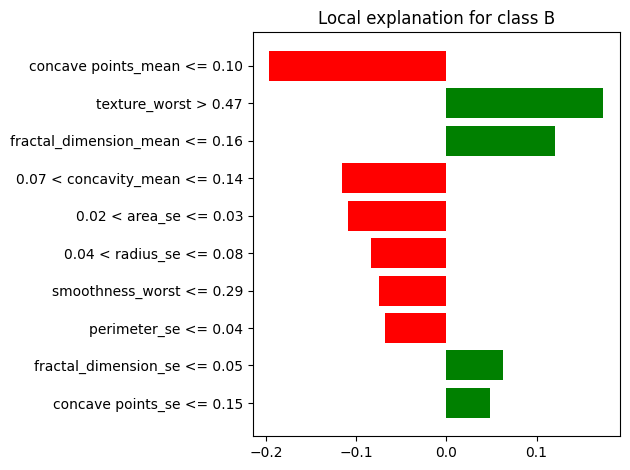

In [ ]:
# Define the explainer
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_minmax.values,
                                                mode='classification',
                                                feature_names=X_df_minmax.columns,
                                                class_names=['M', 'B'])
# Instance 1 and 2
exp = explainer.explain_instance(instance, predict_fn)

exp.as_pyplot_figure()
plt.tight_layout()

*Comparing with the results of the previous, the **texture_worst** feature is the most important feature in the Lime method as in the previous methods. The **fractial dimension mean** is shown to be important in the Lime method but not for the other method.*

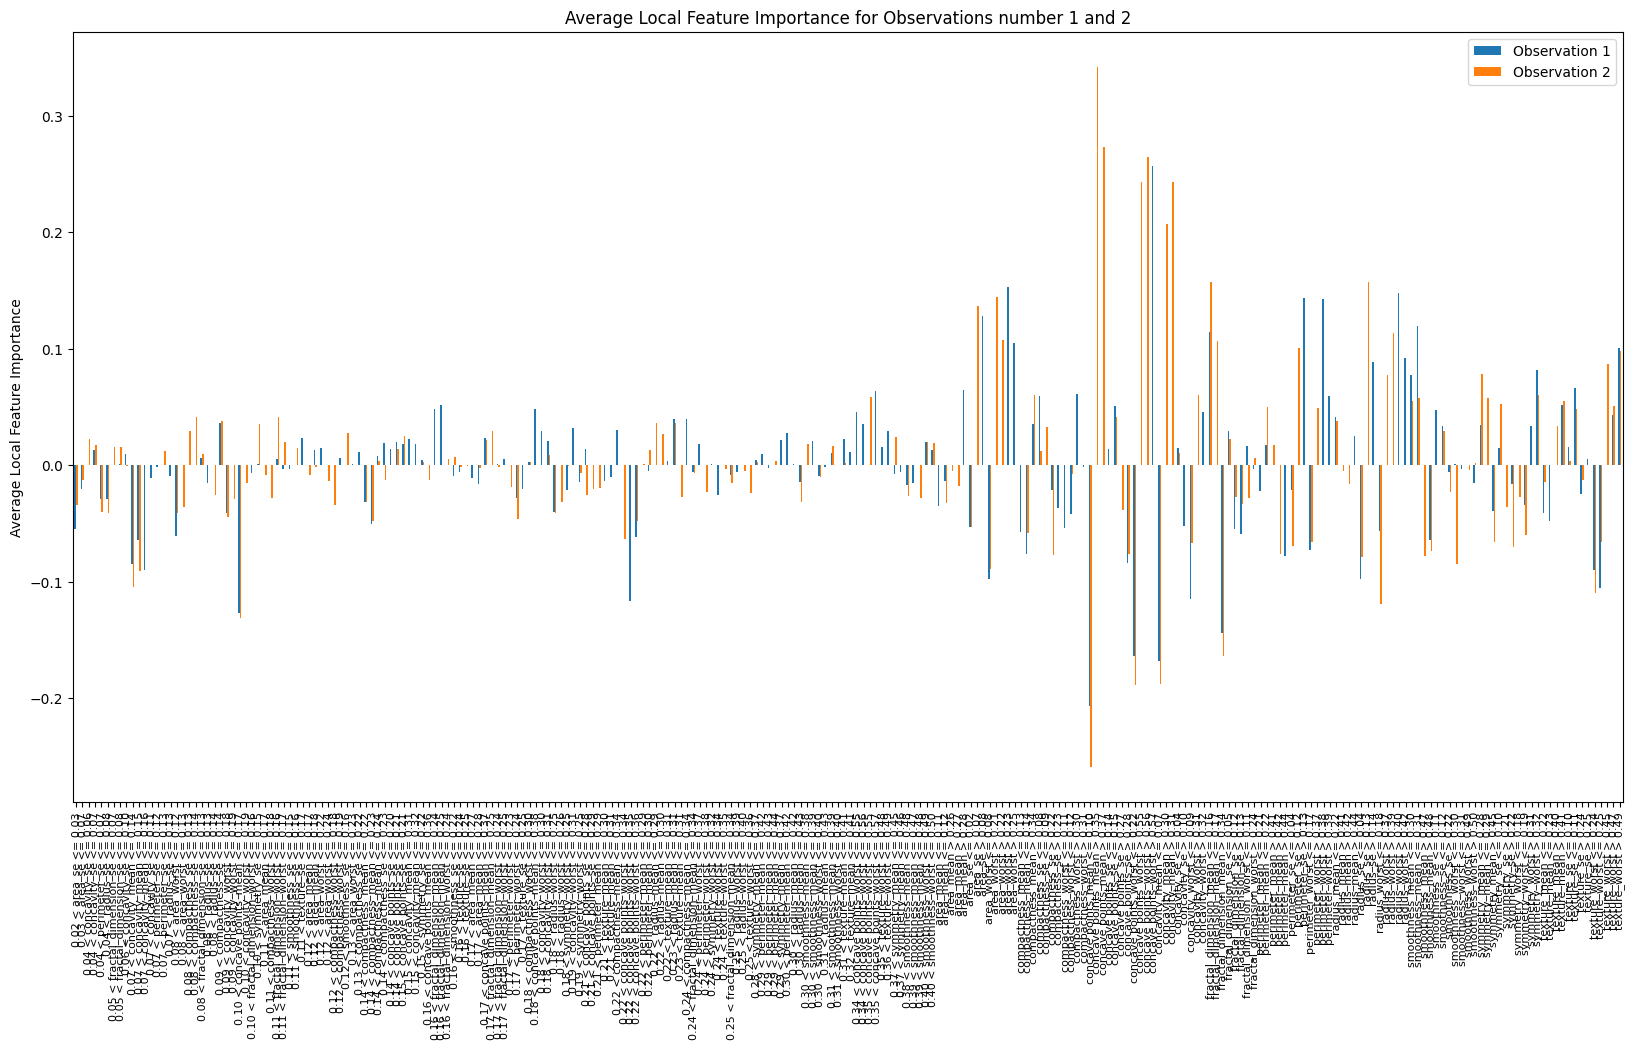

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize an array to hold the local feature importance for each instance
local_importance_1 = []
local_importance_2 = []

random_states = np.random.randint(0, 1000, size=10)

def predict_fn(x):
  pred = model.predict(x, verbose=0)
  return np.hstack((1- pred, pred))

for state in random_states:
  X_train, X_test, Y_train, Y_test = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=state)

  explainer = LimeTabularExplainer(X_train.values, mode='classification', feature_names=X_train.columns, class_names= ['M', 'B'], random_state=random_state)

  model, _  = create_and_train_model(2, 64, 0.2, 'Adam', 0.001, 10, 0,  X_train, Y_train, X_test, Y_test)

  # Explain Observation 1
  exp_1 = explainer.explain_instance(X_test.values[0], predict_fn, num_features=X_test.shape[1])
  local_importance_1.append(dict(exp_1.as_list()))

  # Explain Observation 2
  exp_2 = explainer.explain_instance(X_test.values[1], predict_fn, num_features=X_test.shape[1])
  local_importance_2.append(dict(exp_2.as_list()))

# Convert the local feature importance to dataframe
local_importance_1 = pd.DataFrame(local_importance_1)
local_importance_2 = pd.DataFrame(local_importance_2)

# Compute the average
avg_importance_1 = local_importance_1.mean(axis=0)
avg_importance_2 = local_importance_2.mean(axis=0)

# Create a Dataframe for both instances
avg_importance_df = pd.DataFrame({'Observation 1': avg_importance_1, 'Observation 2': avg_importance_2})

# Plotting
avg_importance_df.plot(kind='bar', figsize=(20,10))
plt.ylabel('Average Local Feature Importance')
plt.title('Average Local Feature Importance for Observations number 1 and 2')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.show()


*We have to much columns in the dataset, but we get some similar results as the previous task. **concativity_mean**, **concativity points_mean**, and **texture_worst** seems to be in the Lime methods important features to the predict the observation 1 and 2 for the whole testing set as for the other methods.*

# **`Task 3 ““Evaluate how features influence the target variable with Partial-Dependence Plots (PDP)“ (10 Scores)`**

1) Construct a PDP for each feature in your dataset. Use “from sklearn.inspection
import PartialDependenceDisplay”.

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier

def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=X_train_minmax.shape[1], activation='relu'))
  for _ in range(2):
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

  return model

model = KerasClassifier(model=create_model, epochs=20, verbose=0, batch_size=32)

model.fit(X_train_minmax, Y_train2, verbose=False)

KerasClassifier(
	model=<function create_model at 0x7fb3dc34c3a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


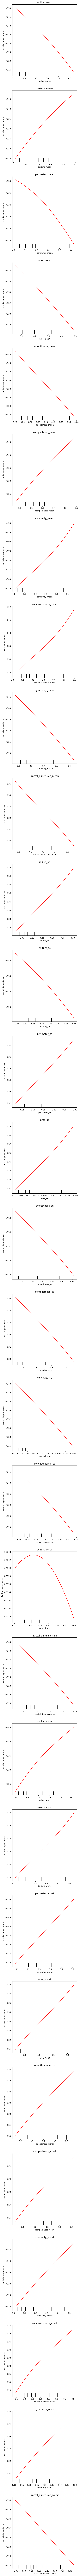

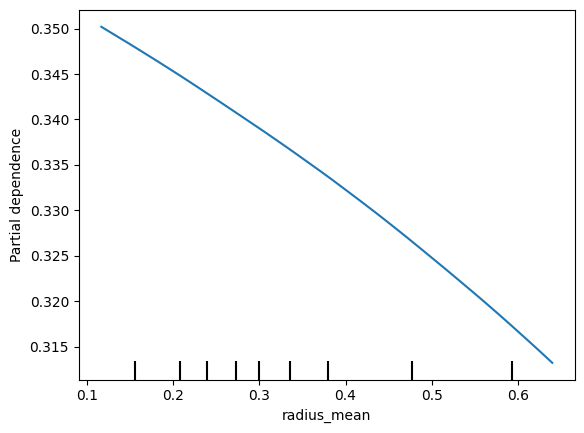

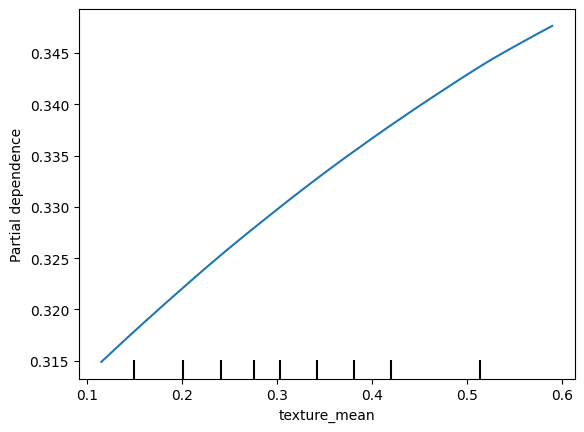

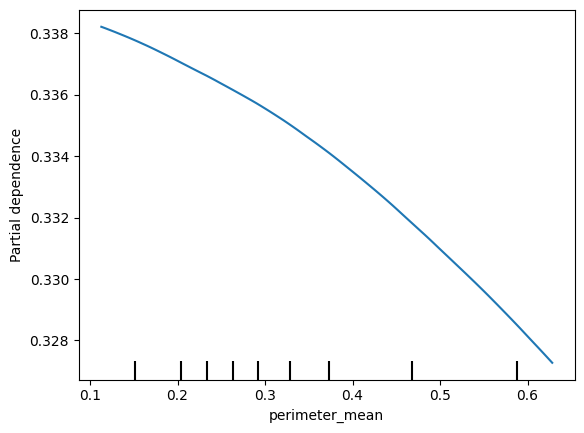

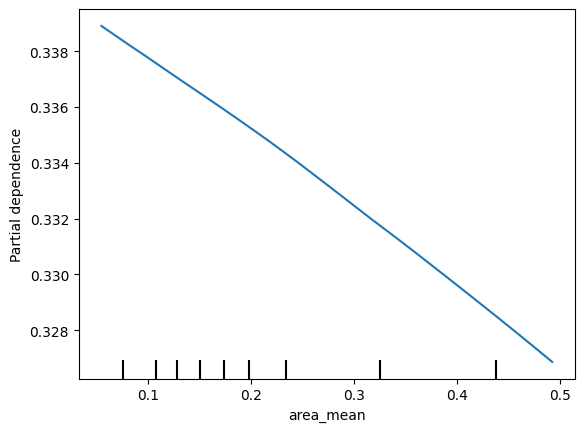

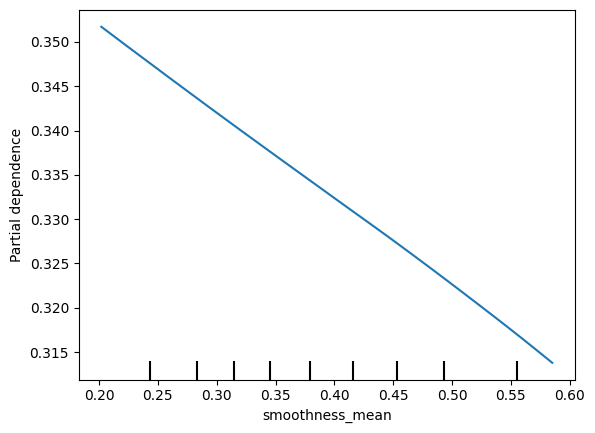

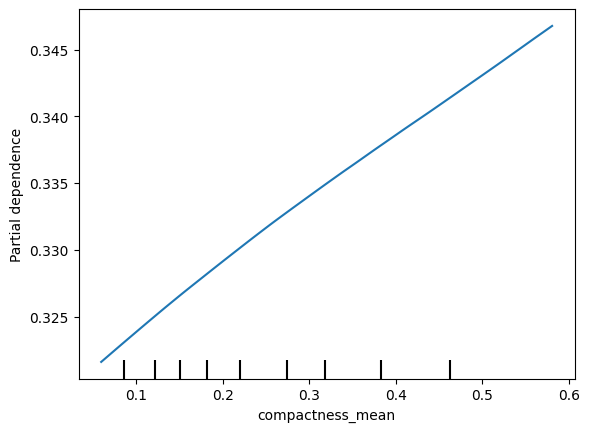

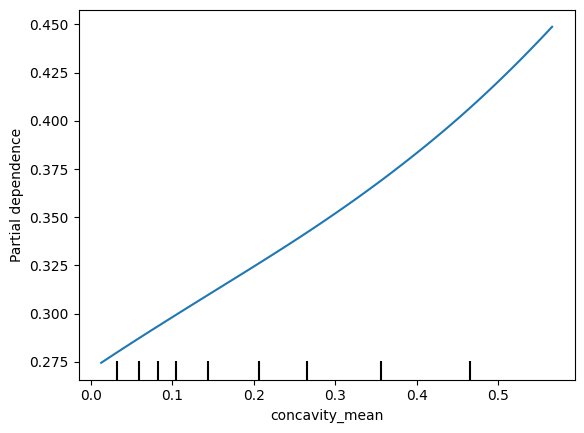

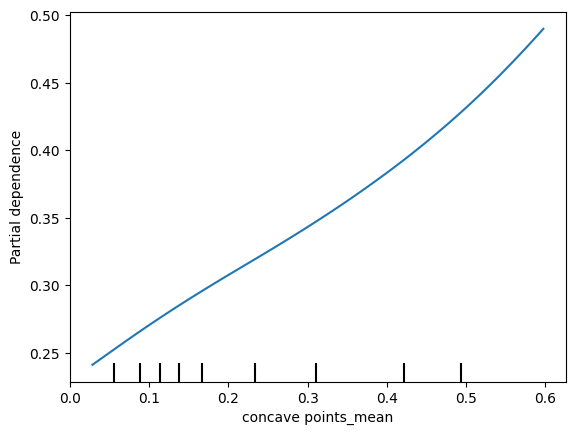

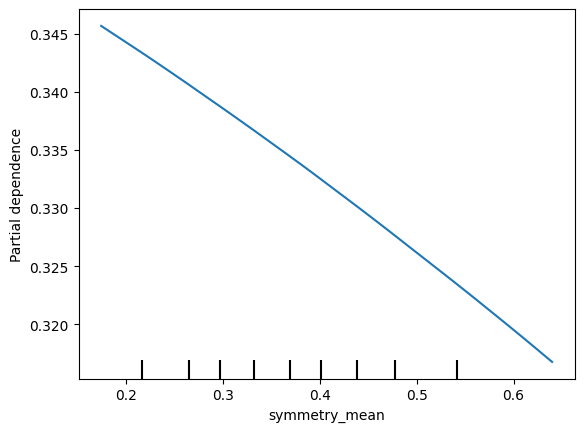

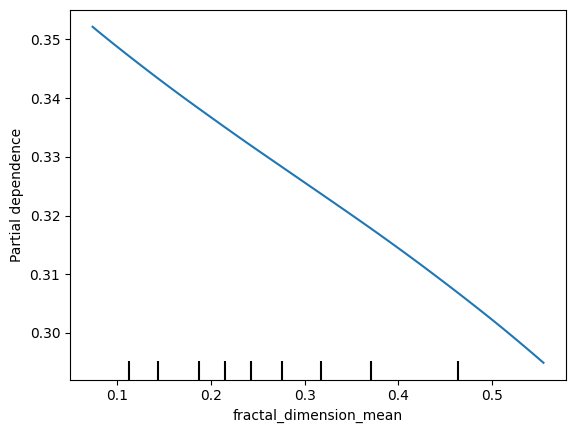

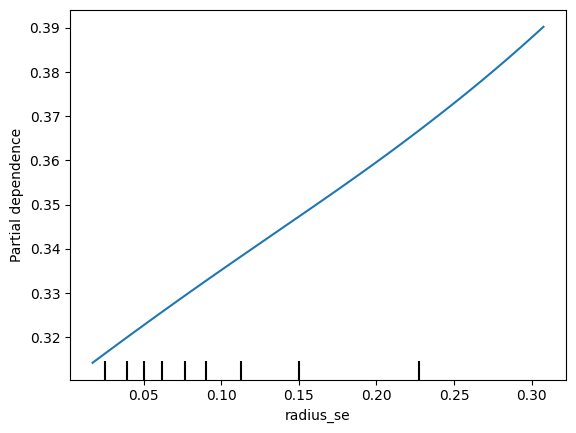

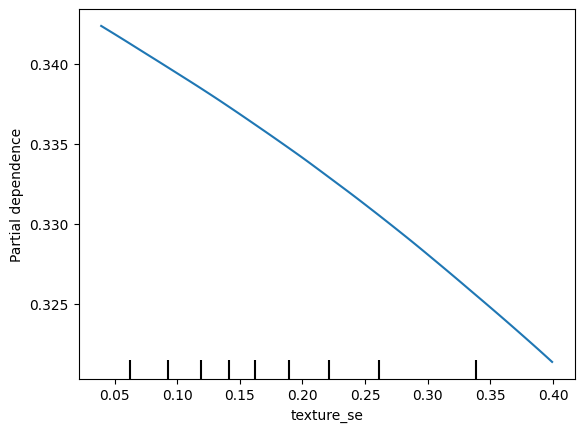

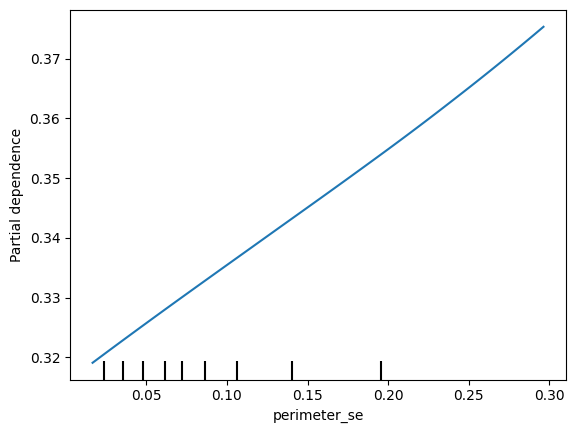

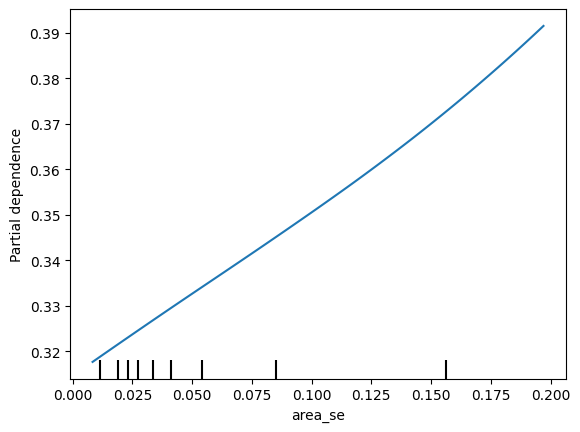

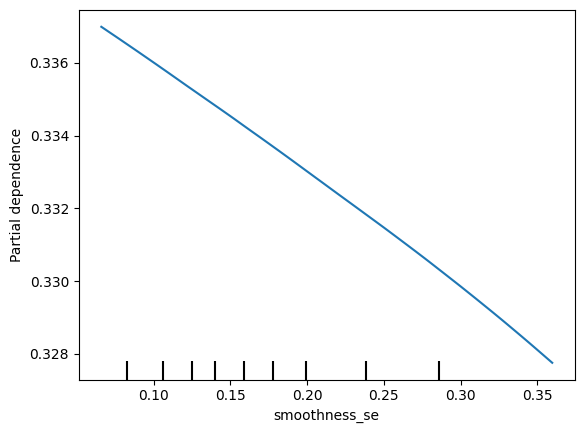

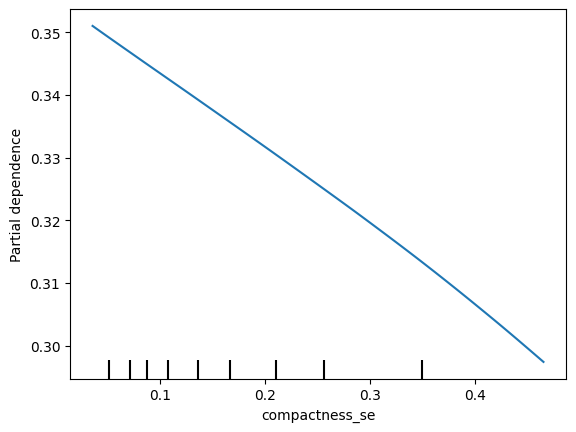

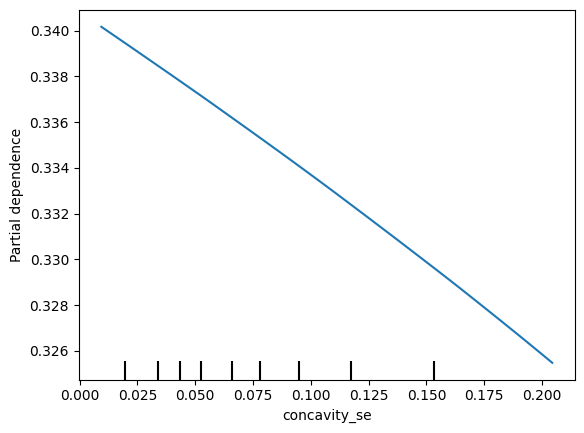

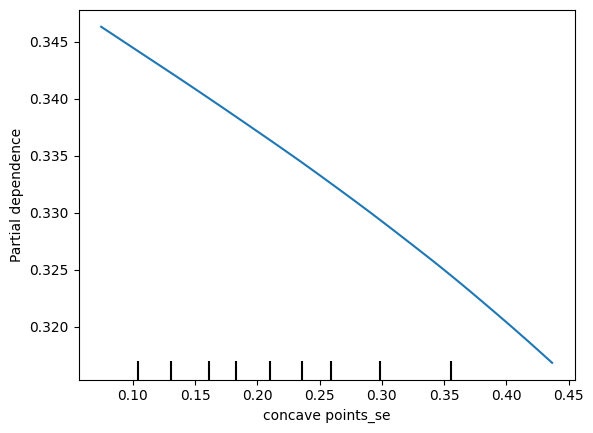

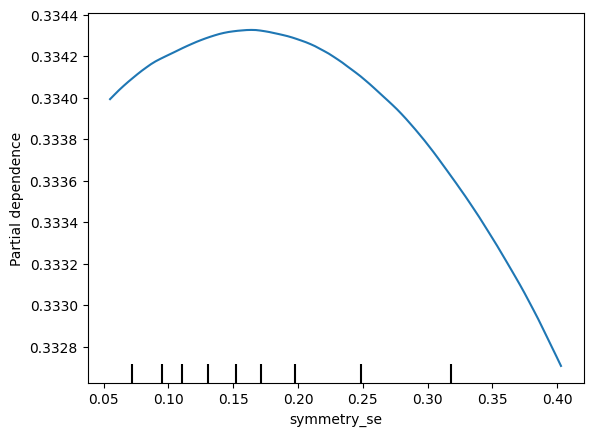

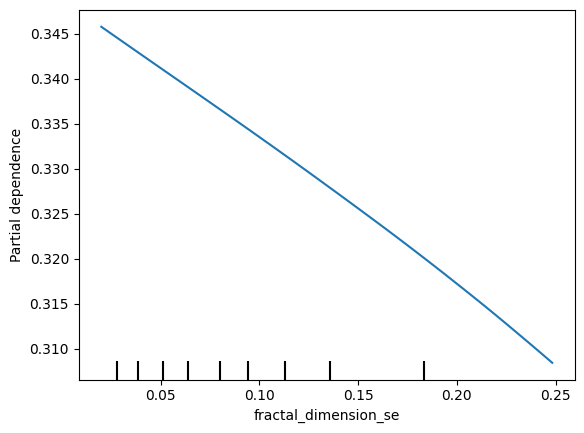

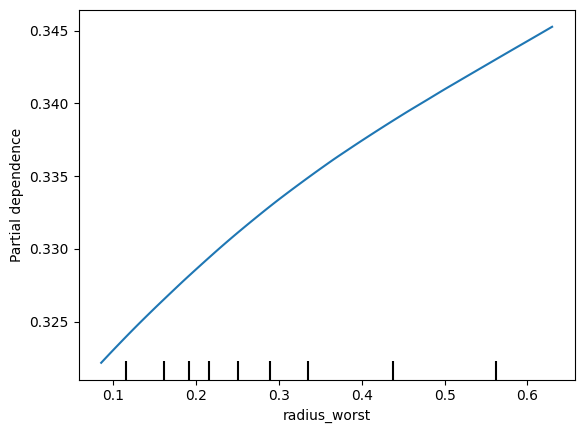

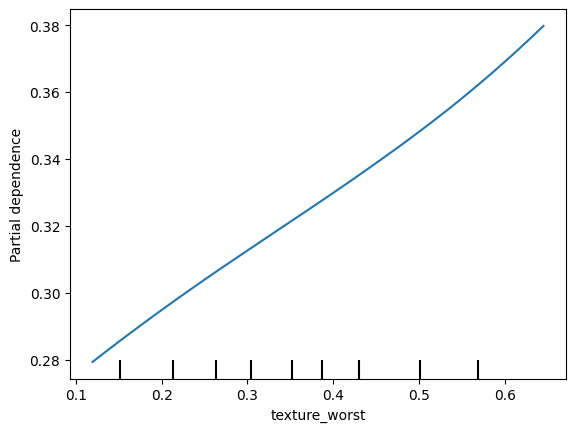

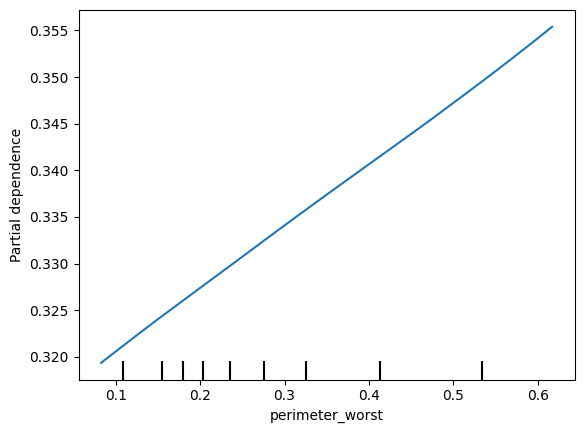

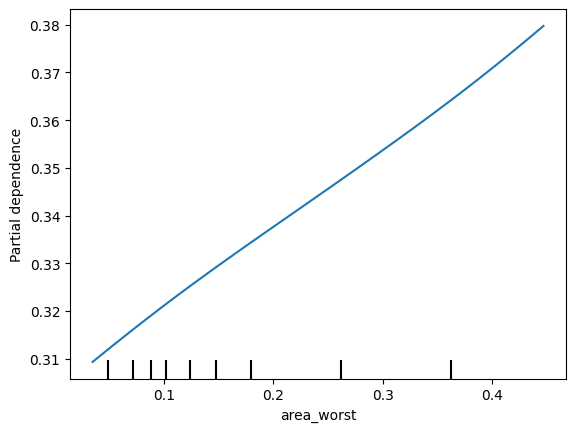

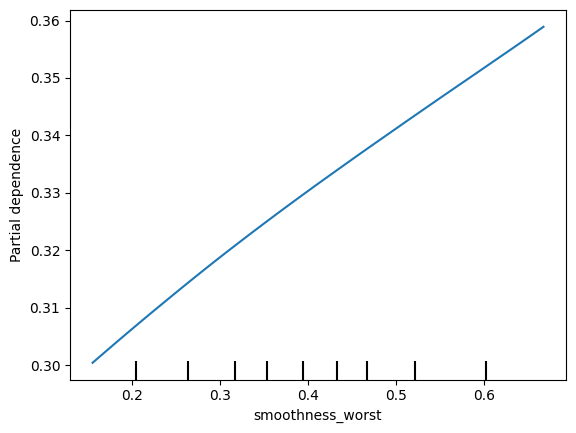

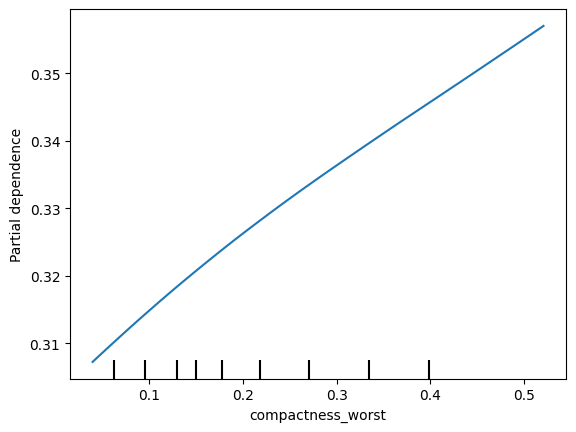

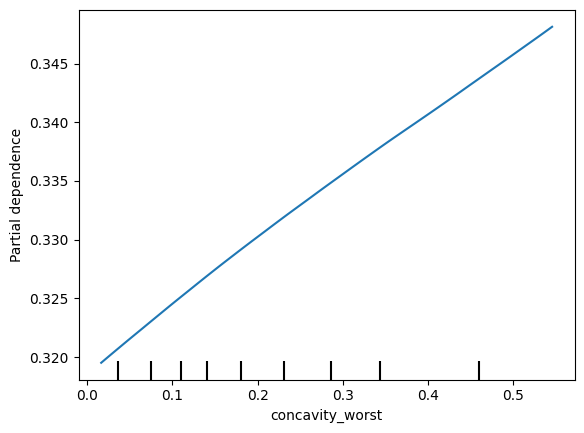

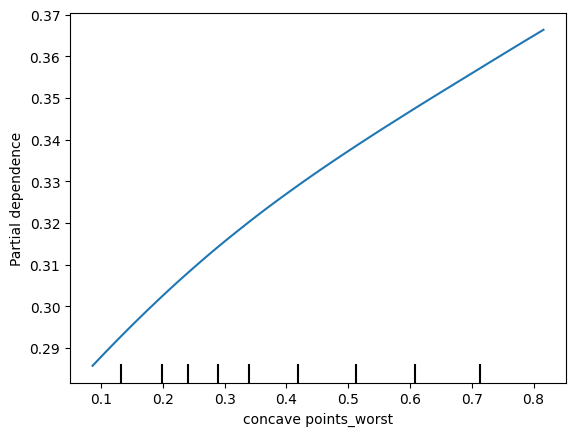

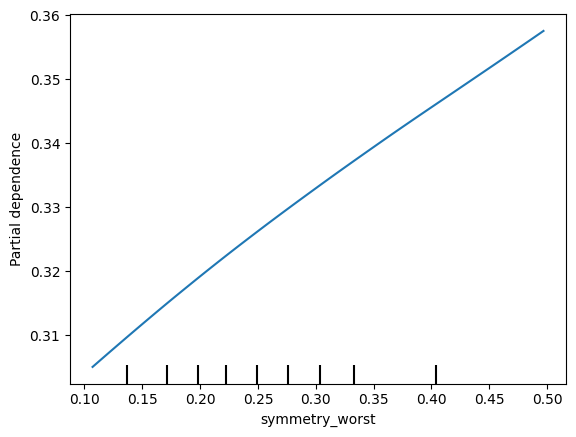

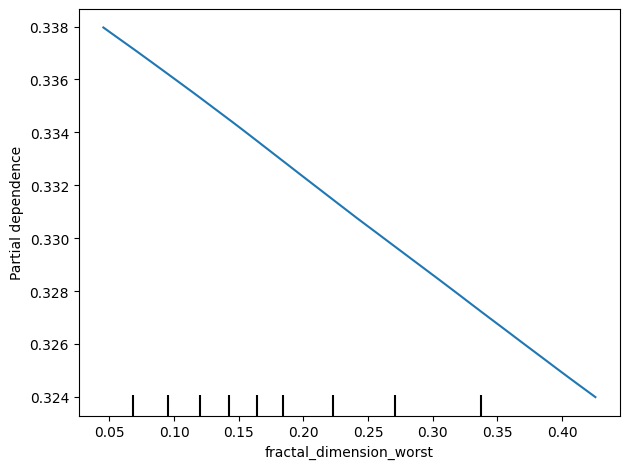

In [ ]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# List all features indices
features = [i for i in range(X_train_minmax.shape[1])]

fig, axs = plt.subplots(len(features), 1 , figsize=(6, 8 * len(features)))

for ax, feature in zip(axs, features):
  pdp_result = partial_dependence(
      model,
      X_train_minmax,
      features=[feature],
      kind='average'
  )

  disp = PartialDependenceDisplay.from_estimator(
      model,
      X_train_minmax,
      features=[feature],
      target = 0/1
  )

  ax.set_title(X_train_minmax.columns[feature])
  disp.plot(ax=ax, line_kw={'color':'red'})

plt.tight_layout()
plt.show()

3) Discuss how each of the variables influence the target variable.

*The y-axis represents the change in the probability of the positve (red) and negative class (blue), and the x-axis represents the value of the feature.*

* **Flat line**: *if the FDP line is flat it means the the feature does not have an impact on the model prediction. Changing this feature does not change the outcome.*

* **Increasing/Decresing line** : *If the PDP is monotonically incresing or decreasing as (**radius_mean**, **concavity mean**..), it indicates a positive or negative correlation between the feature and the predicted outcome. For example, if the line is increasing, it means that as the feature value increases, the predicted outcome also increases.*

* **U-shaped or Inverted U-shaped line**: *If the pdp line forms a U shape or an inverted U shape, it suggests that the relationship between the feature and the outcome is nonlinear. For instance, in a U-shaped PDP, both very low and very high feature values lead to high predictions, whereas mid-range feature values lead to a low predictions.*